# Importing Neccessary Libraries

In [174]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyproj
import pooch
import harmonica as hm
import boule as bl
import verde as vd

# Import Gravity data of South Africa available in Harmonica Library

In [175]:
data=hm.datasets.fetch_south_africa_gravity()
data

,latitude,longitude,elevation,gravity
0,-34.39150,17.71900,-589.0,979724.79
1,-34.48000,17.76100,-495.0,979712.90
2,-34.35400,17.77433,-406.0,979725.89
3,-34.13900,17.78500,-267.0,979701.20
4,-34.42200,17.80500,-373.0,979719.00
...,...,...,...,...
14554,-17.95833,21.22500,1053.1,978182.09
14555,-17.98333,21.27500,1033.3,978183.09
14556,-17.99166,21.70833,1041.8,978182.69
14557,-17.95833,21.85000,1033.3,978193.18


This is absolute gravity data of south africa. Absolute gravity data is given at specific longitude and latitude and elevation(height from mean sea level)

# Visualising Data with contour Plot

Text(0, 0.5, 'latitude')

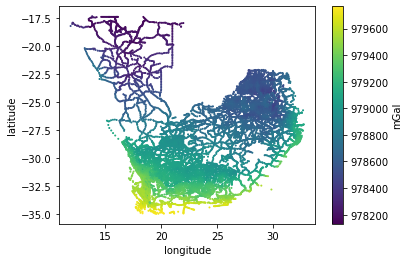

In [176]:
cnt=plt.scatter(data.longitude, data.latitude, c=data.gravity, s=1)
plt.gca().set_aspect("equal")
plt.colorbar(cnt, label="mGal")
plt.xlabel("longitude")
plt.ylabel("latitude")

# Taking only small portion of gravity data for our analysis

In [177]:
# Taking data from longitude 25 to 30 and latitude -27 to -23
#Here we will useverde library . Inside function
region=(25, 30, -27, -23)
inside=vd.inside((data.longitude, data.latitude), region)
inside


0        False
1        False
2        False
3        False
4        False
         ...  
14554    False
14555    False
14556    False
14557    False
14558    False
Length: 14559, dtype: bool

In [178]:
#all the data points which are inside our region are true and other are false.
data=data[inside]
data


,latitude,longitude,elevation,gravity
8848,-26.26334,25.01500,1230.16,978681.38
8849,-26.38713,25.01932,1297.00,978669.02
8850,-26.39667,25.02499,1304.84,978669.28
8851,-26.07668,25.04500,1165.24,978681.08
8852,-26.35001,25.07668,1262.47,978665.19
...,...,...,...,...
13070,-23.27667,29.97501,781.80,978618.60
13071,-23.46793,29.97536,1205.50,978532.84
13072,-23.20833,29.98000,1006.14,978578.51
13073,-23.40500,29.98334,1123.48,978550.42


In [179]:
#Now our data contains only the region we selected

# Visualise Our specific Region

Text(0, 0.5, 'latitude')

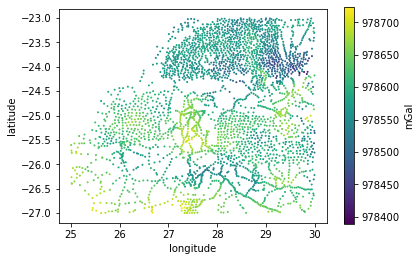

In [180]:
cnt=plt.scatter(data.longitude, data.latitude, c=data.gravity, s=1)
plt.gca().set_aspect("equal")
plt.colorbar(cnt, label="mGal")
plt.xlabel("longitude")
plt.ylabel("latitude")

# Project data into Normal Coordinates

In [181]:
#Our data is in longitude and Latitude. We will convert it into normal coordinates usinf pyproj library
projection=pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
horizontal, vertical = projection(data.longitude.values, data.latitude.values)



In [182]:
data=data.assign(horizontal=horizontal)
data=data.assign(vertical=vertical)
data


,latitude,longitude,elevation,gravity,horizontal,vertical
8848,-26.26334,25.01500,1230.16,978681.38,2.528158e+06,-2.735315e+06
8849,-26.38713,25.01932,1297.00,978669.02,2.528595e+06,-2.749198e+06
8850,-26.39667,25.02499,1304.84,978669.28,2.529168e+06,-2.750269e+06
8851,-26.07668,25.04500,1165.24,978681.08,2.531190e+06,-2.714409e+06
8852,-26.35001,25.07668,1262.47,978665.19,2.534392e+06,-2.745034e+06
...,...,...,...,...,...,...
13070,-23.27667,29.97501,781.80,978618.60,3.029445e+06,-2.404663e+06
13071,-23.46793,29.97536,1205.50,978532.84,3.029480e+06,-2.425602e+06
13072,-23.20833,29.98000,1006.14,978578.51,3.029949e+06,-2.397189e+06
13073,-23.40500,29.98334,1123.48,978550.42,3.030287e+06,-2.418709e+06


Text(0, 0.5, 'Vertical distance')

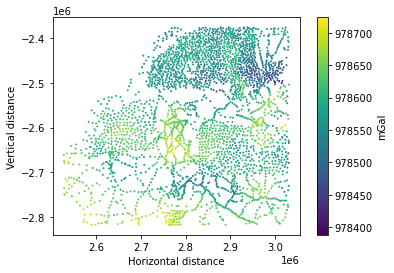

In [183]:
#Visualising Data with Normal Coordinates
cnt=plt.scatter(data.horizontal, data.vertical, c=data.gravity, s=1)
plt.gca().set_aspect("equal")
plt.colorbar(cnt, label="mGal")
plt.xlabel("Horizontal distance")
plt.ylabel("Vertical distance")

# Removing Normal Gravity from Our Data

In [184]:
#Boule Library will be used
# We will import ellipsoid (ellipsoid is theoretical value of normal gravity at all points on Earth calculated by geophysicists using various Mathematical Models)
# We will use WGS84 Ellipsoid
ellipsoid=bl.WGS84
ellipsoid


Ellipsoid(name='WGS84', semimajor_axis=6378137, flattening=0.0033528106647474805, geocentric_grav_const=398600441800000.0, angular_velocity=7.292115e-05, long_name='World Geodetic System 1984', reference='Hofmann-Wellenhof, B., & Moritz, H. (2006). Physical Geodesy (2nd, corr. ed. 2006 edition ed.). Wien\u202f; New York: Springer.')

In [185]:
#From ellipsoid we want normal gravity in our region
normal_gravity=ellipsoid.normal_gravity(data.longitude,data.elevation)
normal_gravity

8848     978576.812917
8849     978556.490453
8850     978554.464034
8851     978598.918721
8852     978571.115331
             ...      
13070    979081.499005
13071    978950.803973
13072    979012.671209
13073    978976.731160
13074    979013.268828
Length: 3178, dtype: float64

In [186]:
#Removing this normal gravity from our observed gravity
gravity_anomaly= data.gravity-normal_gravity
gravity_anomaly

8848     104.567083
8849     112.529547
8850     114.815966
8851      82.161279
8852      94.074669
            ...    
13070   -462.899005
13071   -417.963973
13072   -434.161209
13073   -426.311160
13074   -438.258828
Length: 3178, dtype: float64

In [187]:
data=data.assign(gravity_anomaly=gravity_anomaly)
data

,latitude,longitude,elevation,gravity,horizontal,vertical,gravity_anomaly
8848,-26.26334,25.01500,1230.16,978681.38,2.528158e+06,-2.735315e+06,104.567083
8849,-26.38713,25.01932,1297.00,978669.02,2.528595e+06,-2.749198e+06,112.529547
8850,-26.39667,25.02499,1304.84,978669.28,2.529168e+06,-2.750269e+06,114.815966
8851,-26.07668,25.04500,1165.24,978681.08,2.531190e+06,-2.714409e+06,82.161279
8852,-26.35001,25.07668,1262.47,978665.19,2.534392e+06,-2.745034e+06,94.074669
...,...,...,...,...,...,...,...
13070,-23.27667,29.97501,781.80,978618.60,3.029445e+06,-2.404663e+06,-462.899005
13071,-23.46793,29.97536,1205.50,978532.84,3.029480e+06,-2.425602e+06,-417.963973
13072,-23.20833,29.98000,1006.14,978578.51,3.029949e+06,-2.397189e+06,-434.161209
13073,-23.40500,29.98334,1123.48,978550.42,3.030287e+06,-2.418709e+06,-426.311160


#  Visualising Gravity Anomaly

Text(0, 0.5, 'Vertical distance')

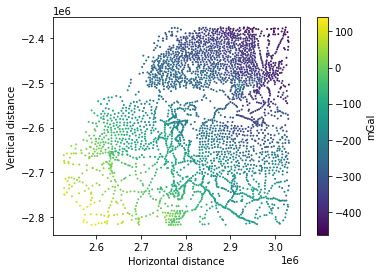

In [189]:
cnt=plt.scatter(data.horizontal, data.vertical, c=data.gravity_anomaly, s=1)
plt.gca().set_aspect("equal")
plt.colorbar(cnt, label="mGal")
plt.xlabel("Horizontal distance")
plt.ylabel("Vertical distance")

Text(0, 0.5, 'Vertical distance')

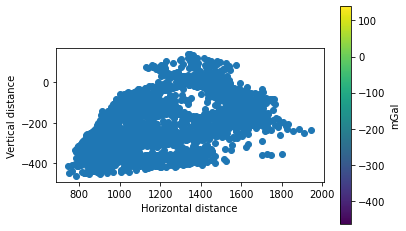

In [192]:
plt.scatter(data.elevation, data.gravity_anomaly)
plt.gca().set_aspect("equal")
plt.colorbar(cnt, label="mGal")
plt.xlabel("Horizontal distance")
plt.ylabel("Vertical distance")